In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance, anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

%matplotlib inline

In [11]:
dieta = pd.read_csv(r"C:\Users\Daniela de la Torre\OneDrive\Escritorio\4to_Semestre\Analisis Estadistico Multivariado\Dieta.csv")
dieta

,gender,Diet,weight,weight6weeks
0,M,B,60,60.0
1,M,B,103,103.0
2,F,A,58,54.2
3,F,A,60,54.0
4,F,A,64,63.3
...,...,...,...,...
73,M,C,83,80.2
74,M,C,84,79.9
75,M,C,85,79.7
76,M,C,87,77.8


In [13]:
dieta.shape

(78, 4)

In [15]:
dieta.info()
dieta.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        78 non-null     object 
 1   Diet          78 non-null     object 
 2   weight        78 non-null     int64  
 3   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ KB


,weight,weight6weeks
count,78.000000,78.000000
mean,72.525641,68.680769
std,8.723344,8.924504
min,58.000000,53.000000
25%,66.000000,61.850000
50%,72.000000,68.950000
75%,78.000000,73.825000
max,103.000000,103.000000


In [16]:
dieta.isnull().sum()

gender          0
Diet            0
weight          0
weight6weeks    0
dtype: int64

In [18]:
dieta['Diet'].value_counts()

Diet
B    27
C    27
A    24
Name: count, dtype: int64

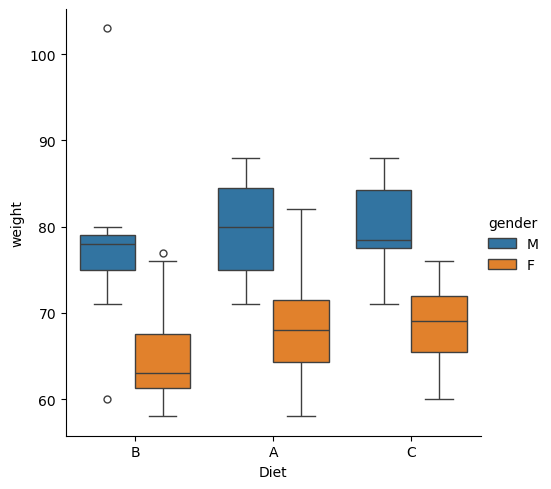

In [20]:
sns.catplot(x="Diet", y="weight", hue='gender', kind="box", data=dieta)
plt.show()

Prueba de hipotesis general

H0
  : Las medias de la variable 'weight6weeks' con respecto a cada género son iguales.

H1
 : Al menos una de las medias de la variable 'weight6weeks' con respecto a cada género no son iguales.

Anova de un factor tomando 'gender' como variable

In [21]:
formula = 'weight6weeks ~ C(gender)'
model = ols(formula, diet).fit()
aov_table = anova_lm(model)
print(aov_table)

             df       sum_sq      mean_sq          F        PR(>F)
C(gender)   1.0  2854.201553  2854.201553  66.162186  6.097209e-12
Residual   76.0  3278.599601    43.139468        NaN           NaN


Hipótesis del ANOVA unidireccional de la variable "Dieta" con la variable "weight6weeks".

H0
: Las medias de la variable "weight6weeks" con respecto a cada categoría de dieta son iguales.

H1
: Al menos una de las medias de la variable "weight6weeks" con respecto a cada categoría de dieta es desigual.

Anova de un factor con la variable dieta

In [22]:
formula = 'weight6weeks ~ C(Diet) '
model = ols(formula, diet).fit()
aov_table = anova_lm(model)
print(aov_table)

            df       sum_sq    mean_sq         F    PR(>F)
C(Diet)    2.0    29.841339  14.920670  0.183362  0.832839
Residual  75.0  6102.959815  81.372798       NaN       NaN


Hipótesis del ANOVA con las variables "género" y "Dieta" respecto a la variable "weight6weeks".

H0
: Las medias de la variable "weight6weeks" respecto a cada categoría de dieta y género son iguales.

H1
: Al menos una de las medias de la variable "weight6weeks" respecto a cada categoría de dieta y género es desigual.

ANOVA con las variables 'género' y 'Dieta' con respecto a la variable 'weight6weeks'.

In [23]:
formula = 'weight6weeks ~ C(gender) + C(Diet)'
model = ols(formula, diet).fit()
aov_table = anova_lm(model)
print(aov_table)

             df       sum_sq      mean_sq          F        PR(>F)
C(gender)   1.0  2854.201553  2854.201553  65.765339  8.037802e-12
C(Diet)     2.0    67.015520    33.507760   0.772072  4.657403e-01
Residual   74.0  3211.584082    43.399785        NaN           NaN


C:\Users\Daniela de la Torre\AppData\Local\Temp\ipykernel_17364\334281853.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Diet', y='weight6weeks', data=diet, hue='gender',ci=None);


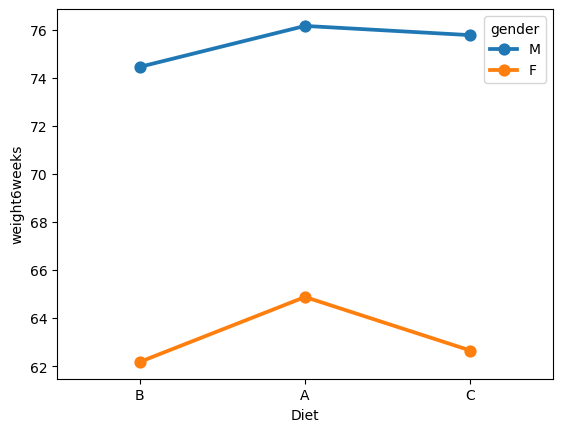

In [24]:
sns.pointplot(x='Diet', y='weight6weeks', data=diet, hue='gender',ci=None);

No existe interacción entre ellos y por tanto tenemos evidencia suficiente para aceptar la Hipótesis Nula